# WINE QUALITY PREDICTION  CODECLAUSE 

# BY SRIKANTA MAHARA 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# LOADING OF DATASET 

In [2]:
wine = pd.read_csv('C:\\Users\\A\\Downloads\\winequalityN.csv')

# CHECKING FIRST 10 ROWS OF THE DATSET

In [3]:
wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
wine.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# CHECKING COLOUMNS NAMES 

In [5]:
print("Column names in the 'WINE' dataset:")
print(wine.columns.tolist())

Column names in the 'WINE' dataset:
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# DESCRIPTIVE STATISTICS OF THE DATASET

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# INFORMATION ABOUT THE DATASET 

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
pred_test = wine.iloc[3]

In [9]:
pred_test['type'] = 1
pred_test.drop(['quality','total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide      47.0
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

# CHECKING NUMBER OF ROWS AND COLOUMNS 

In [10]:
wine.shape

(6497, 13)

# CHECKING THE NUMBER OF NULL VALUES 

In [11]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
# One to remove na values is just by dropping them since they are very few
wine.dropna()
#another way is to impute let's say average value 
#wine.update(wine.fillna(wine.mean()))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# COUNTING THE NUMBER OF WINE 

In [13]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

# PLOTTING THE DATASET

Text(0.5, 1.0, ' Catplot')

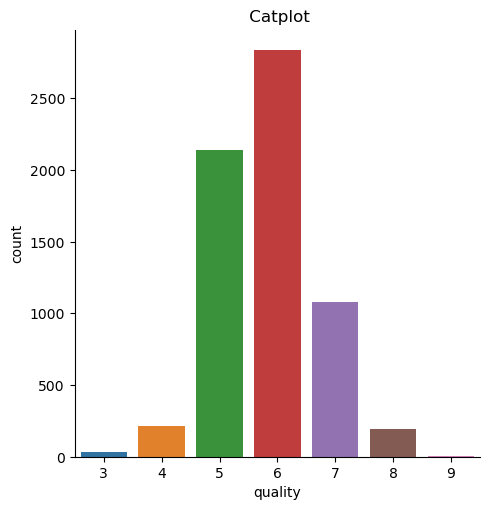

In [14]:
# number of values for each quality
sns.catplot(x='quality', data = wine, kind = 'count')
plt.title (" Catplot")

Text(0.5, 1.0, ' Barplot')

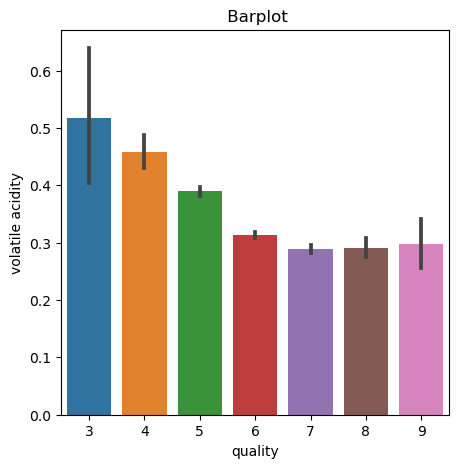

In [15]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)
plt.title (" Barplot")

Text(0.5, 1.0, ' Countplot')

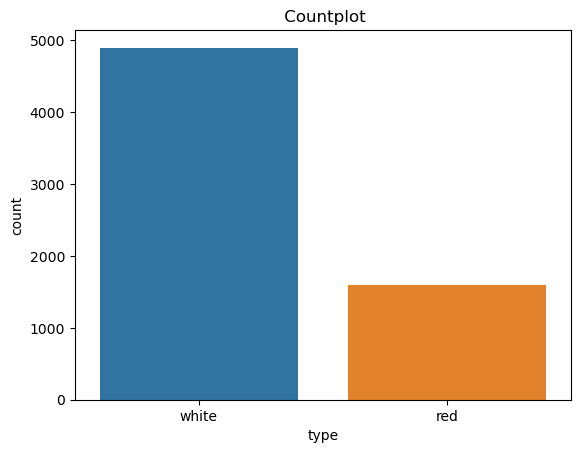

In [16]:
sns.countplot(x="type", data=wine)
plt.title (" Countplot")

# COUNTING THE QUALITY

In [17]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Text(0.5, 1.0, 'GG-plot')

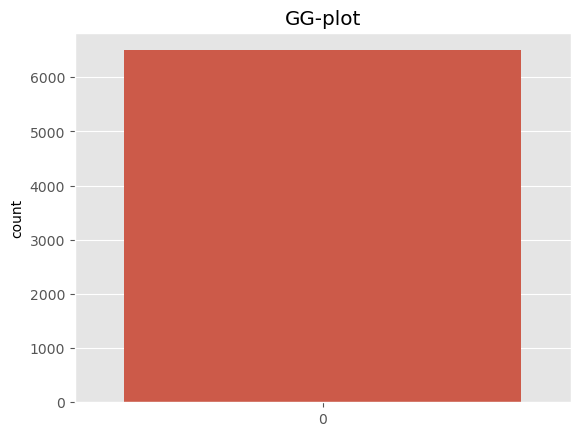

In [18]:
style.use('ggplot')
sns.countplot(wine['quality'])
plt.title ("GG-plot")

In [19]:
wine['type'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: type, dtype: float64

<Axes: >

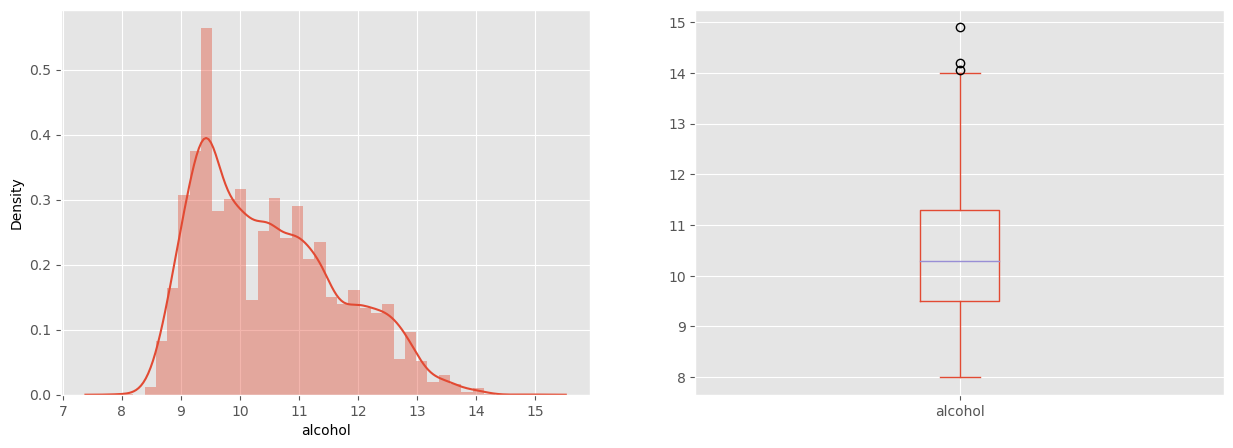

In [20]:
#Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))
#repeat this for all the variables and understand the distribution

Text(0.5, 1.0, ' Barplot')

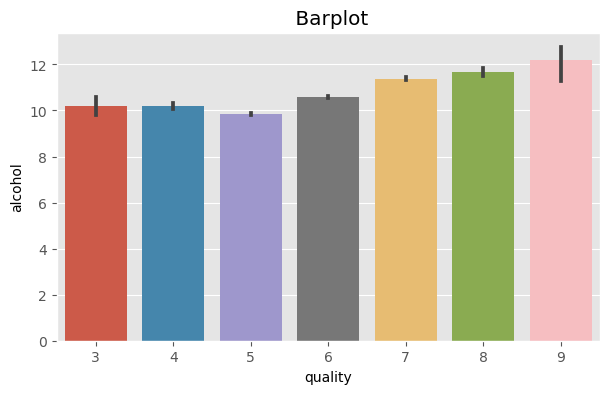

In [21]:
#bivariate analysis to check quality with all the other variables
plt.figure(figsize=(7,4))
sns.barplot(x='quality',y='alcohol',data=wine)
plt.title (" Barplot")

Text(0.5, 1.0, ' Barplot')

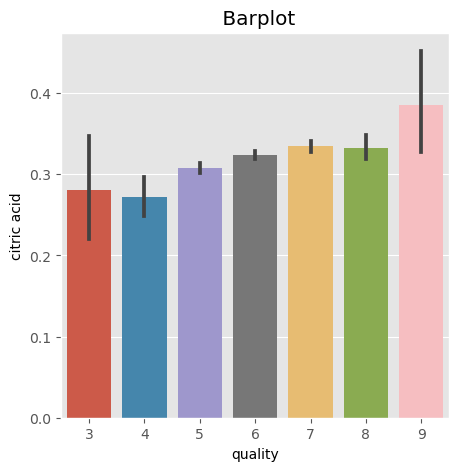

In [22]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine)
plt.title (" Barplot")

Text(0.5, 1.0, 'Pairplot')

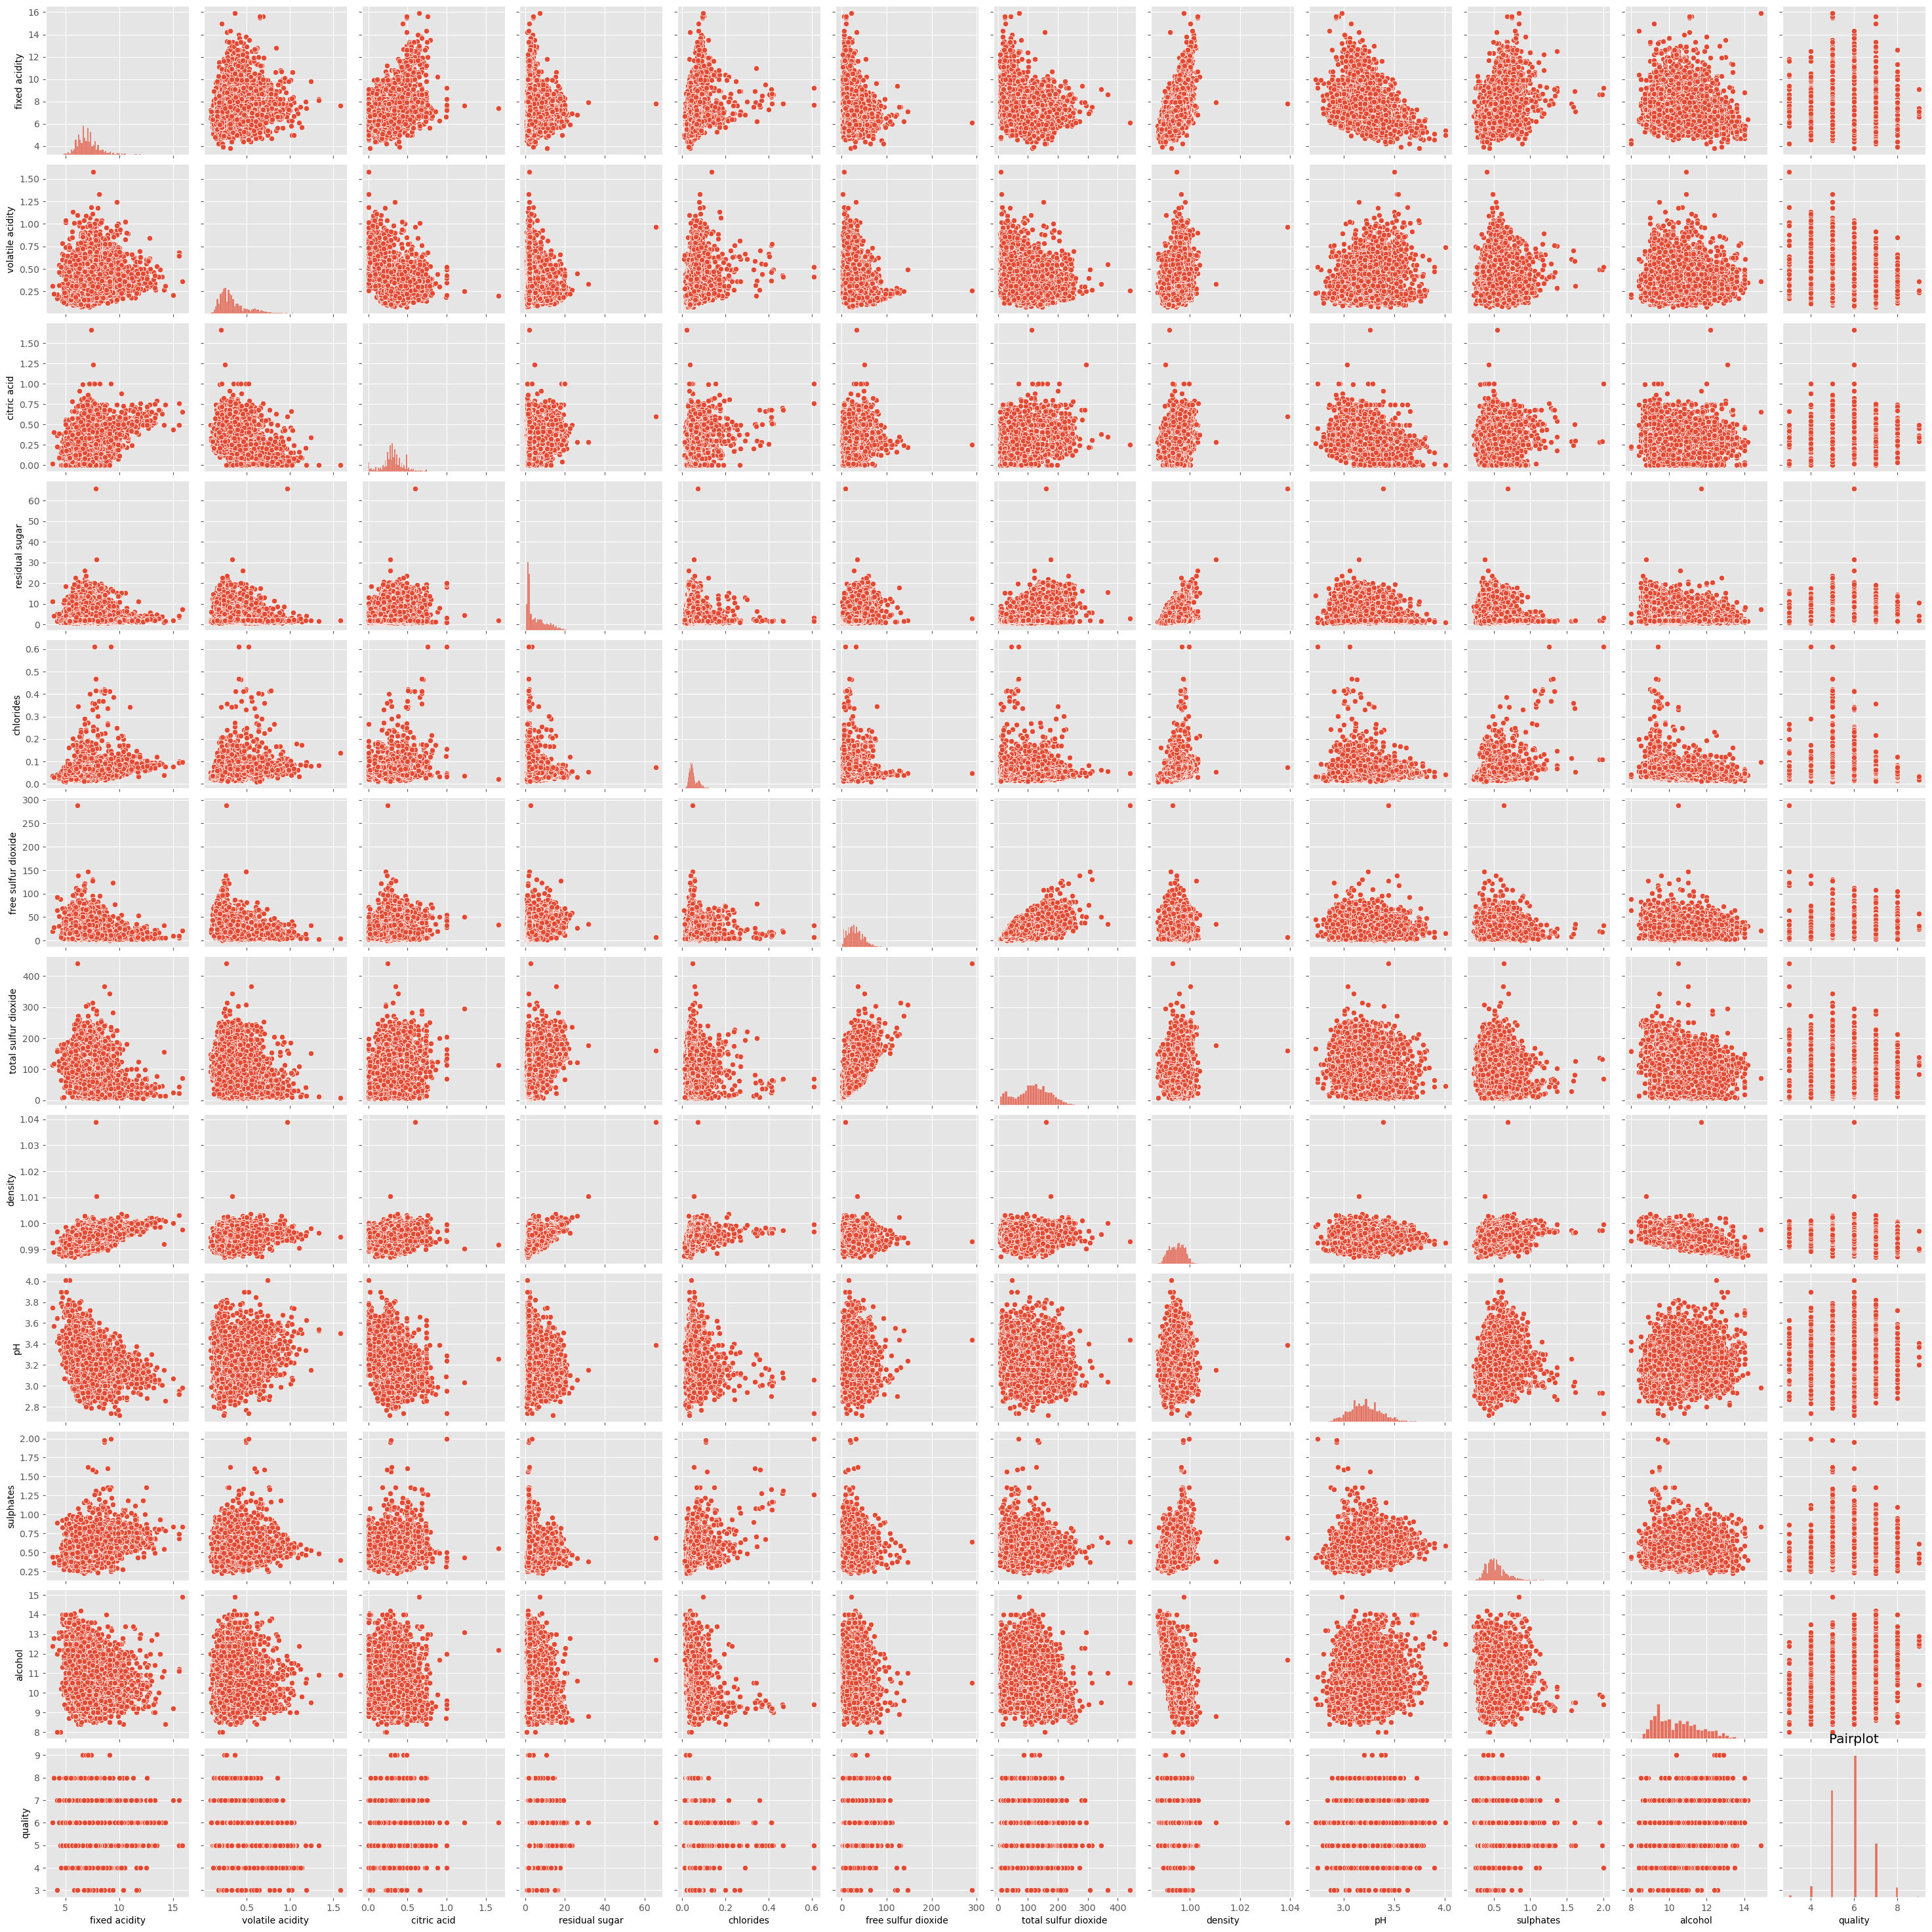

In [23]:
#Plotting all variables for their distribution and relation
sns.pairplot(wine)
plt.title ("Pairplot")

In [24]:
#checking correlation
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


In [25]:
#Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide',axis=1)

In [26]:
#Convert categorical value to dummies
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [27]:
wine_ml.dtypes

fixed acidity          float64
volatile acidity       float64
citric acid            float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
density                float64
pH                     float64
sulphates              float64
alcohol                float64
quality                  int64
type_white               uint8
dtype: object

In [28]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality',axis=1)

In [29]:
X.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
type_white             0
dtype: int64

In [30]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X)
x_standard = scaler.transform(X)

In [33]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [34]:
X = x_standard

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=123)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()

In [39]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test)

In [41]:
pred_test_output = logreg.predict(pred_test_std)
pred_test_output

array([0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred)

0.9682907965970611

In [43]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1252
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1293
   macro avg       0.48      0.50      0.49      1293
weighted avg       0.94      0.97      0.95      1293



In [44]:
confusion_matrix(Y_test, y_pred)

array([[1252,    0],
       [  41,    0]], dtype=int64)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=200)

In [47]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
rfc_pred = rfc.predict(X_test)

In [49]:
accuracy_score(Y_test, rfc_pred)

0.974477958236659

In [50]:
confusion_matrix(Y_test, rfc_pred)

array([[1252,    0],
       [  33,    8]], dtype=int64)

In [51]:
classification_report(Y_test, rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      1252\n           1       1.00      0.20      0.33        41\n\n    accuracy                           0.97      1293\n   macro avg       0.99      0.60      0.66      1293\nweighted avg       0.98      0.97      0.97      1293\n'

In [52]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1252
           1       1.00      0.20      0.33        41

    accuracy                           0.97      1293
   macro avg       0.99      0.60      0.66      1293
weighted avg       0.98      0.97      0.97      1293



In [53]:
rfc.feature_importances_

array([0.08707156, 0.10822817, 0.07955883, 0.1111145 , 0.0913309 ,
       0.10418566, 0.11355947, 0.09385492, 0.10416675, 0.10455195,
       0.00237729])

<Axes: >

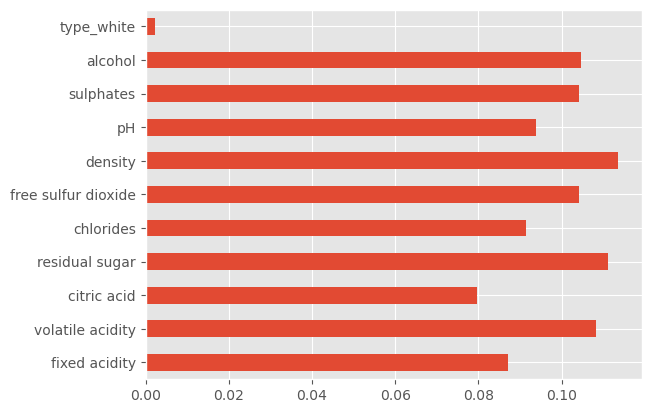

In [54]:
pd.Series(rfc.feature_importances_,index=wine_ml.drop('quality',axis=1).columns).plot(kind='barh')

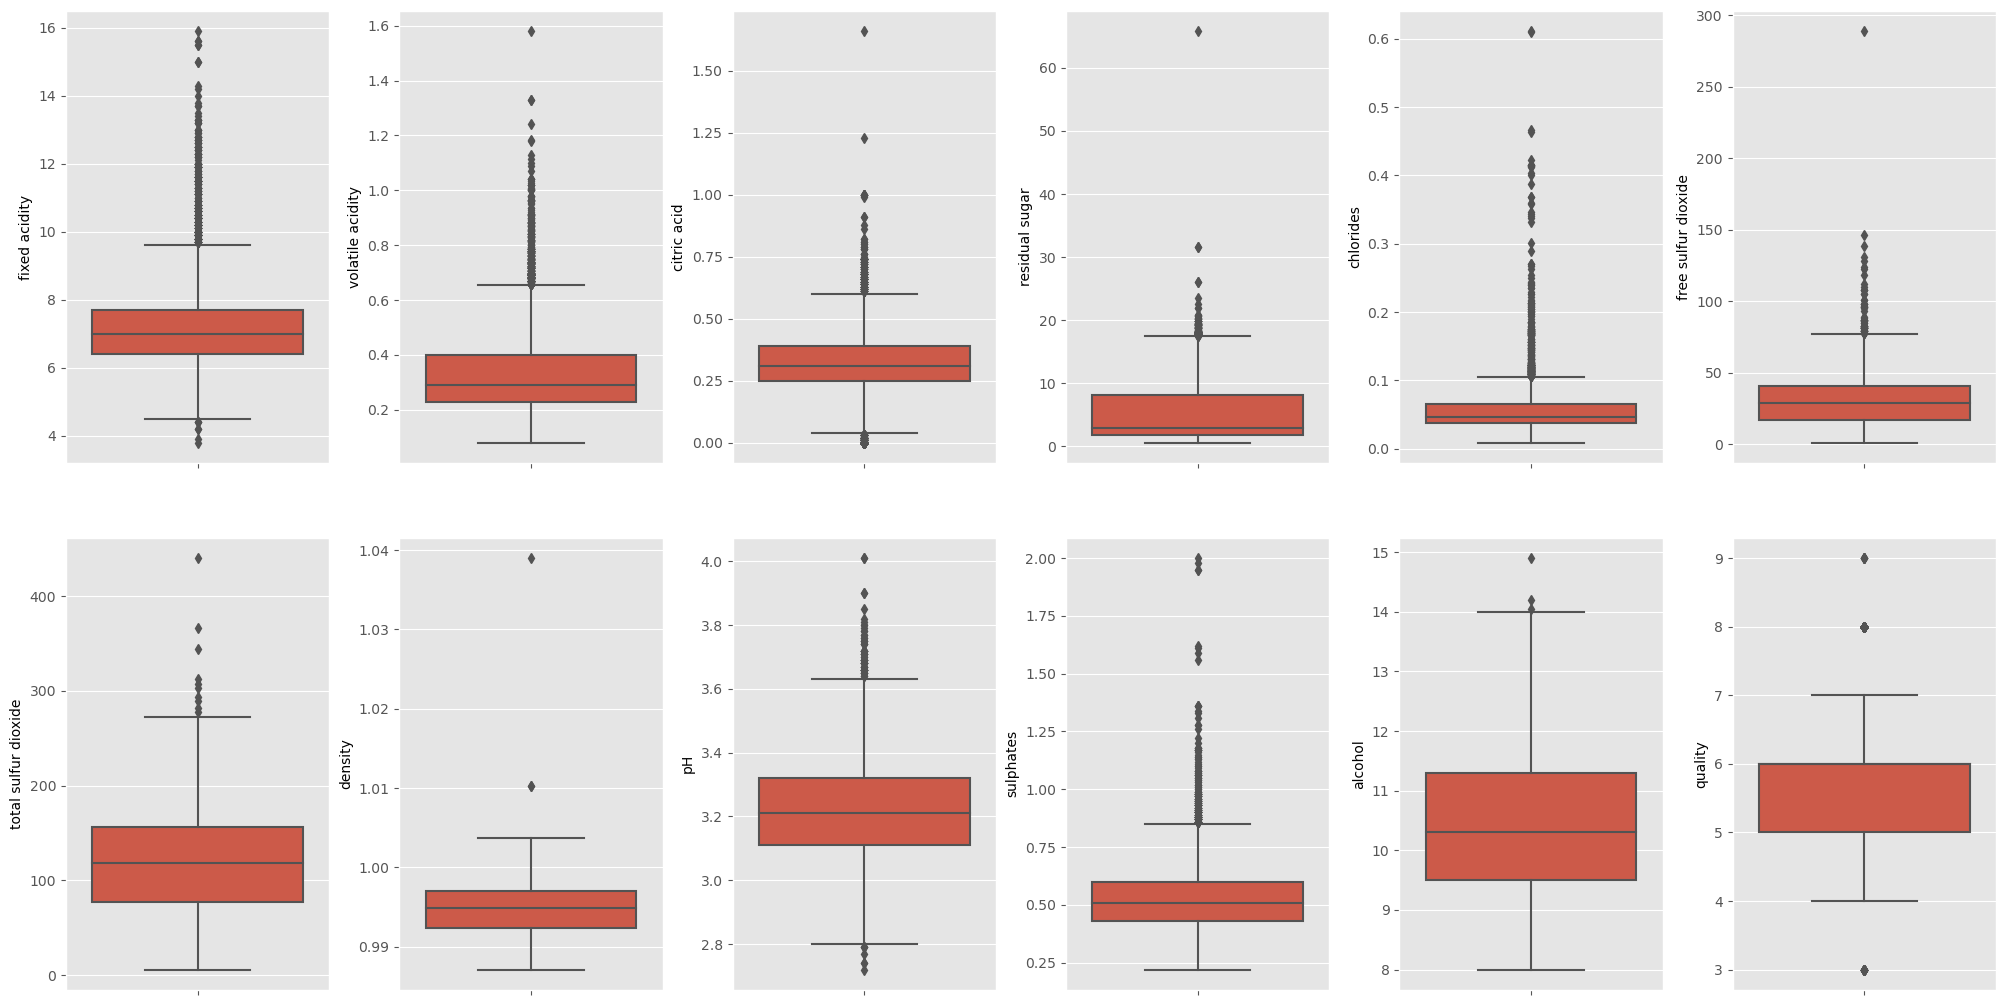

In [55]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

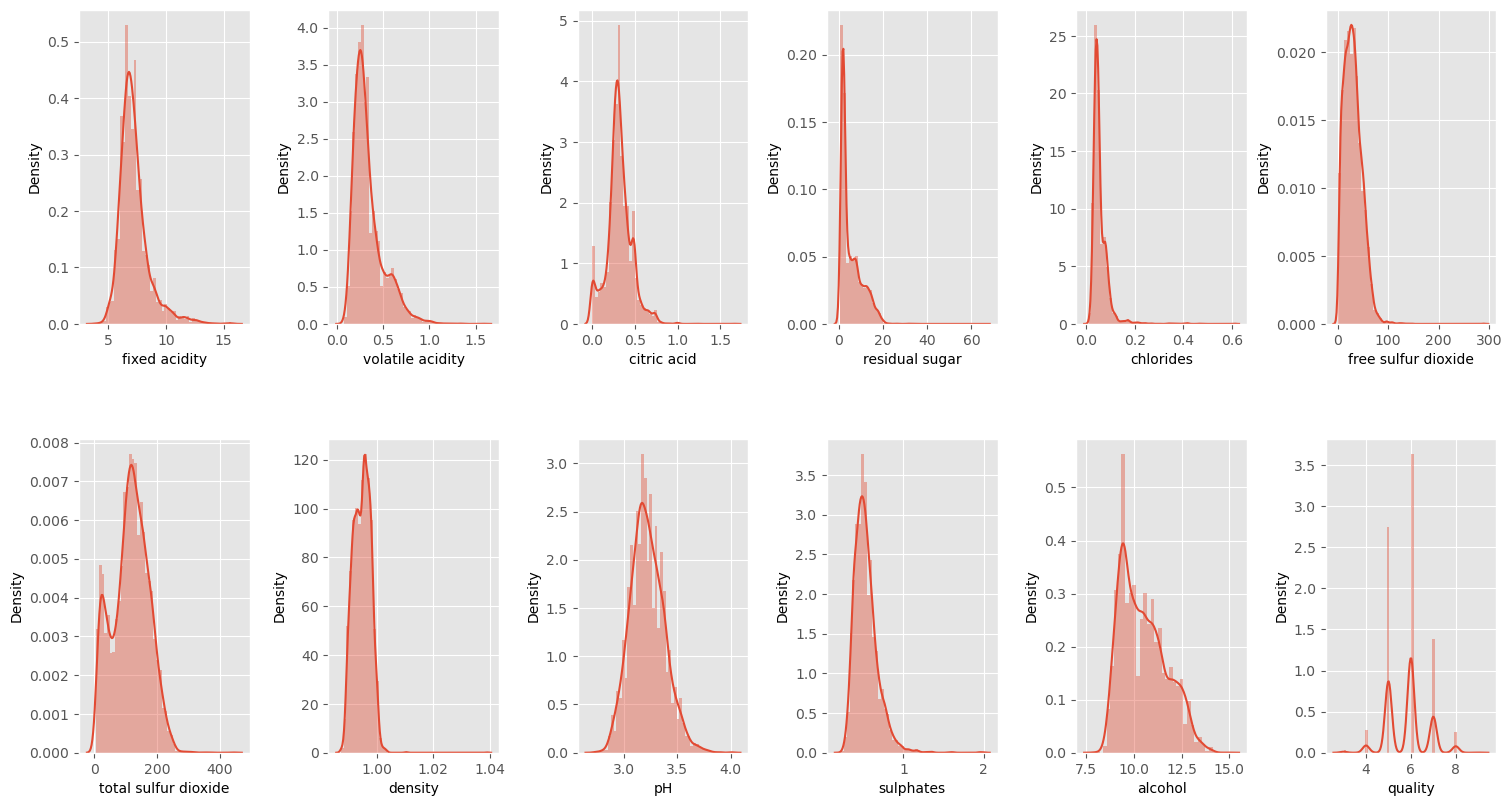

In [56]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,8))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

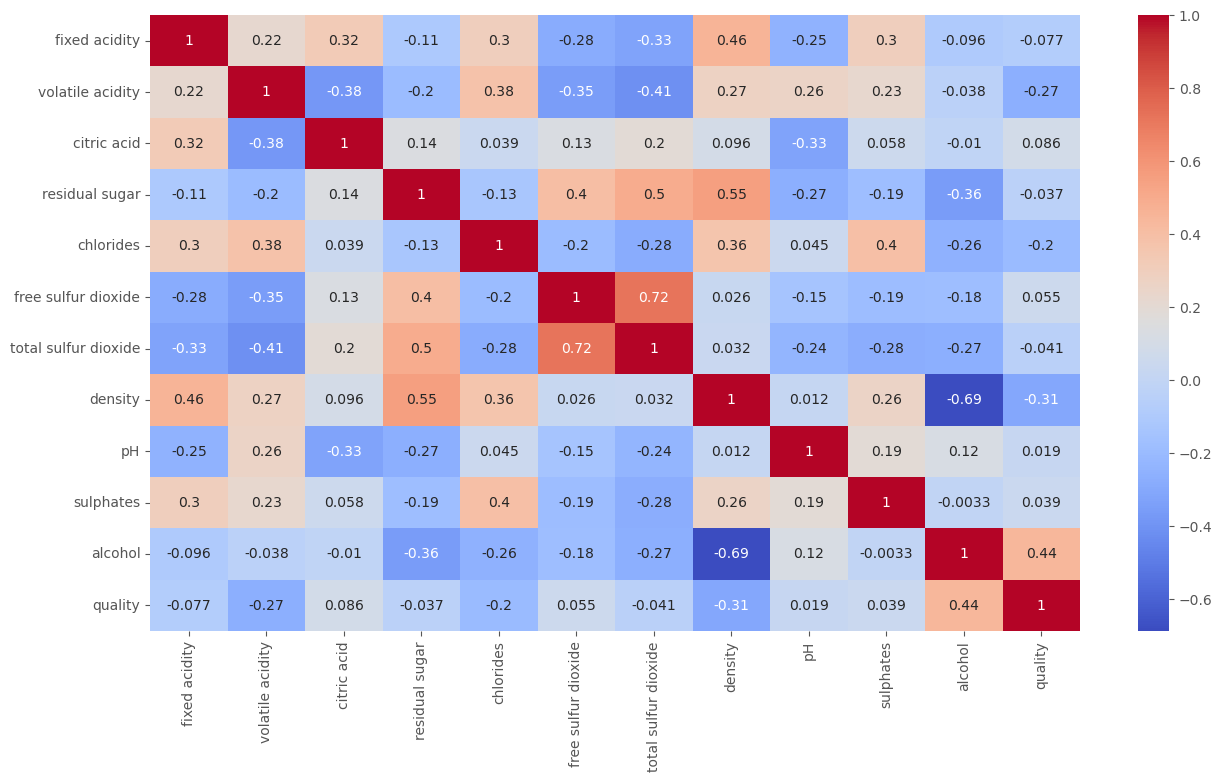

In [57]:
corr = wine.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [58]:
X = wine.drop(columns=['type', 'quality'])
y = wine['quality']

In [59]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [60]:
X = wine.drop('quality',axis=1)

In [61]:
print(X)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [62]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [63]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [65]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


In [66]:
print("X_train ", X_train.shape)
print("y_train ", Y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", Y_test.shape)

X_train  (5197, 12)
y_train  (5197,)
X_test  (1300, 12)
y_test  (1300,)
